In [15]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

In [16]:
nn = 20
num_grids = 10

In [17]:
load = loadmat("./gpuexp-8-1.mat")
numB = load["numB"]

In [18]:
fracdims = np.zeros((num_grids,num_grids))
cuts = np.zeros((num_grids,num_grids))
fracdimerr = np.zeros((num_grids,num_grids))

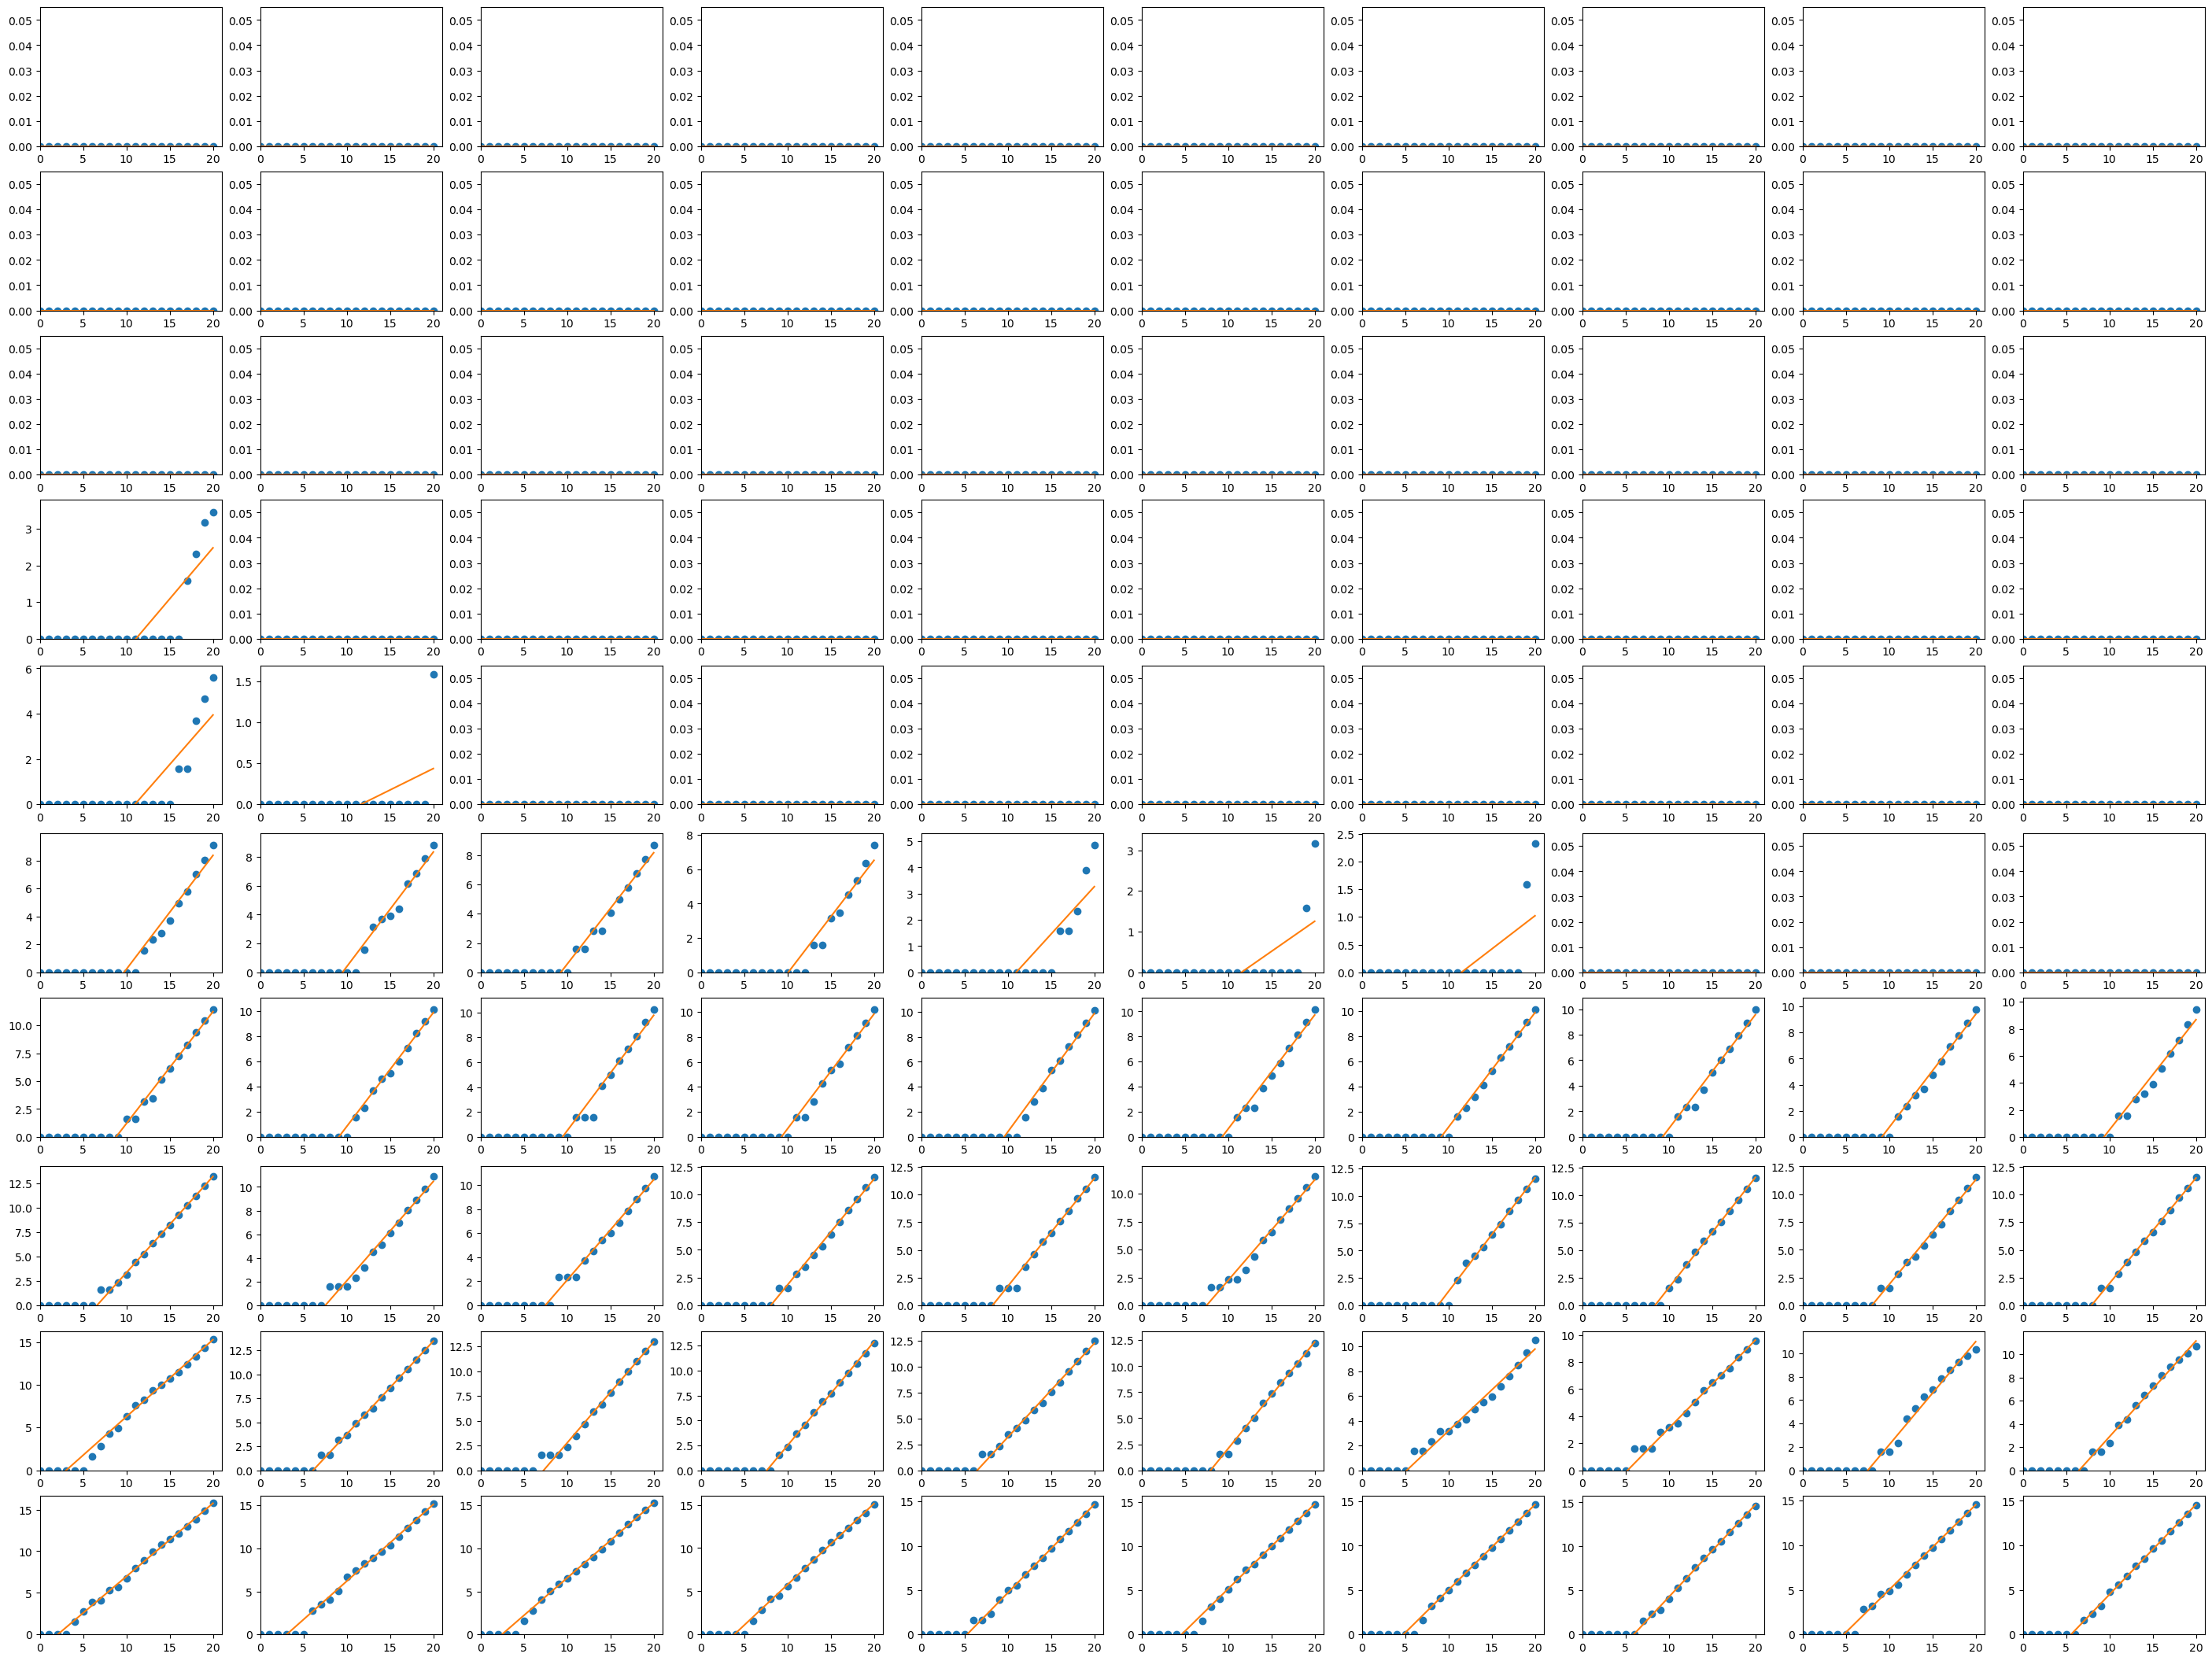

In [30]:
fig, axs = plt.subplots(10,10, figsize=(28, 21), constrained_layout=True)
for i in range(num_grids):
    for j in range(num_grids):
        axs[i, j].plot(np.arange(nn+1), np.log2(numB[i,j]),'o')
        '''
        if np.sum(np.log2(numB[i,j,:])>0) > 4:
            pp, VV = np.polyfit(np.arange(nn+1)[np.log2(numB[i,j,:])>0], np.log2(numB[i,j,:])[np.log2(numB[i,j,:])>0], 1, cov=True)
            slope, cut = pp
            fracdims[i,j] = slope
            cuts[i,j] = cut
            fracdimerr[i,j] = np.sqrt(VV[0][0])
        '''
        slope, cut = np.linalg.lstsq(np.vstack([np.arange(8,nn+1), np.ones(nn+1-8)]).T , np.log2(numB[i,j,8:]), rcond=None)[0]
        fracdims[i,j] = slope
        axs[i, j].plot(np.arange(nn+1), slope * np.arange(nn+1) + cut)
        #axs[i, j].plot(np.arange(nn+1), fracdims[i,j] * np.arange(nn+1) + cuts[i,j])
        axs[i, j].set_ylim(0,)
        axs[i, j].set_xlim(0,)
        #axs[i, j].set_title('pH of Comm. '+str(ii+1))
#plt.savefig('./figures/exp-4SI.pdf')

In [31]:
wl = np.linspace(0.01,1)
ep = wl**2 / 1e+4 / 2/np.pi**2

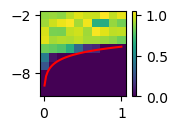

In [33]:
plt.figure(figsize=(3.375/2, 3.375/8.5*3), constrained_layout=True)
plt.imshow(fracdims, origin='lower',extent=(0.01-0.055,1+0.055,-10-0.4,-2+0.4), aspect=1/8)
plt.colorbar()
plt.plot(wl,np.log10(ep),'r')
plt.yticks([-8,-2])
#plt.xlabel('Wavelength, $\lambda$')
#plt.ylabel('Amplitude, $\epsilon$')
plt.savefig('./figures/gpuexp-8-1.pdf')